
##  Представьте, что вы устроились работать аналитиком в отдел рекламы, и ваша первая задача — помочь коллегам разобраться с некоторыми вопросами:

1. Получить статистику по дням. Посчитать число всех событий по дням, число показов, число кликов.


2. Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?


3. Найти топ 5 объявлений по CTR за все время. Различается ли средний и медианный CTR объявлений в наших данных?


4. Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! Сколько таких объявлений? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?


5. Подсчитать общую сумму платных объявлений(click/CPC and view/CPM(на 1000 показов)


6. А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?



## Описание колонок


date — день, в который происходят события


time — точное время события


event — тип события, может быть или показ или клик по рекламе


platform — платформа, на которой произошло рекламное событие


ad_id — id рекламного объявления


client_union_id — id рекламного клиента


campaign_union_id — id рекламной кампании


ad_cost_type — тип объявления с оплатой за клики (CPC) или за показы (CPM)


ad_cost — стоимость объявления в рублях, для CPC объявлений — это цена за клик, для CPM — цена за 1000 показов


has_video — есть ли у рекламного объявления видео


target_audience_count — размер аудитории, на которую таргетируется объявление



In [3]:
#импортируем библиотеки
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/Users/kamilamur/data from course/ads_data.csv',parse_dates = ['date'])
df.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [5]:
#Создадим колонку с датами, включая часы и минуты

df['full_date'] = pd.to_datetime(df.time, unit = 's')
df.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [6]:
df.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [7]:
df.dtypes

ad_id                             int64
time                              int64
event                            object
date                     datetime64[ns]
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
campaign_union_id                 int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
full_date                datetime64[ns]
dtype: object

In [8]:
df.full_date.dt.month

0          4
1          4
2          4
3          4
4          4
          ..
3176709    4
3176710    4
3176711    4
3176712    4
3176713    4
Name: full_date, Length: 3176714, dtype: int64

In [9]:
df.event.nunique()

2

<AxesSubplot:>

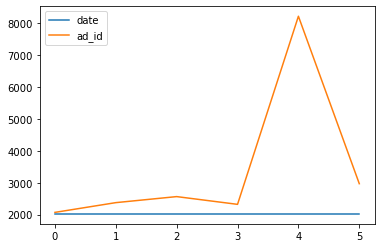

In [10]:
#Оцениваем количество объявлений по дням  

df.groupby(['date'],as_index=False) \
    .agg({'ad_id':'count'}).plot()

# Заметен скачок в количестве рекламных оббявлений 4 числа
#Необходимо оценить, за счет каких конкретно событий это произошло

In [11]:
#Оцениваем количество всех событий под дням, создаем отдельные колонки для кликов и просмотров

df.groupby(['date','event'],as_index=False) \
    .agg({'ad_id':'count'}) \
    .pivot(index='date', columns = 'event', values = 'ad_id').reset_index()

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [12]:
#Оцениваем количество уникальных объявлений по дням 

df.groupby('date',as_index=False) \
    .agg({'ad_id':pd.Series.nunique})

,date,ad_id
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,179
3,2019-04-04,150
4,2019-04-05,131
5,2019-04-06,61


In [13]:
#Теперь нужно разобраться с выбросом 2019-04-05
# сначала - оценим количество событий для каждой рекламы в этот день

df.query("date == '2019-04-05'")\
    .groupby('ad_id',as_index=False) \
    .agg({'time':'count'})\
    .sort_values('time',ascending=False)


#Видно, что количетсво событий(112583) с ad_id 112583 значительно отличается от других 


,ad_id,time
108,112583,2166611
27,29927,27186
65,44635,8268
81,46583,7327
66,44956,5656
...,...,...
77,46433,17
17,21405,16
76,46024,16
112,113867,15


In [14]:
#Отдельно рассмотрим данные, связанные с этим рекламным объявлением
df.query("ad_id == 112583").head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36
527125,112583,1554480636,click,2019-04-05,CPM,0,111818,112260,android,199.4,239408,6243,2019-04-05 16:10:36
527126,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,android,199.4,239408,2470,2019-04-05 16:10:36
527127,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,5435,2019-04-05 16:10:36
527128,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,android,199.4,239408,6092,2019-04-05 16:10:36


In [15]:
#Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех кликов объявлений к просмотрам. 
#Например, если у объявления было 100 показов и 2 клика, CTR = 0.02.
#Различается ли средний и медианный CTR объявлений в наших данных?


#Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
#Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

In [16]:
#Необходимо рассчитать CTR для каждого объявления
#Первый шаг - преобразовать данные из колонки events

df_events = df.groupby(['ad_id', 'event'],as_index=False)\
    .agg({'time':'count'}) \
    .pivot(index='ad_id', columns = 'event',values = 'time').reset_index()

df_events.head()


event,ad_id,click,view
0,3,9.0,490.0
1,2132,1.0,95.0
2,2276,2.0,1454.0
3,2475,NaN,132.0
4,2643,3.0,286.0


In [17]:
#Создаем колонку с CTR, оцениваем топ 5 объявлений по ctr

df_events['CTR'] = df_events.click / df_events.view

df_events.sort_values('CTR',ascending=False).head(10)


event,ad_id,click,view,CTR
289,112583,580436.0,1934788.0,0.300000
324,119450,258.0,1254.0,0.205742
125,38575,43.0,257.0,0.167315
144,40968,29.0,217.0,0.133641
207,45642,42.0,344.0,0.122093
283,110924,11.0,95.0,0.115789
194,45043,28.0,245.0,0.114286
96,35034,112.0,997.0,0.112337
5,4585,53.0,476.0,0.111345
328,120347,236.0,2168.0,0.108856


In [18]:
df_events.sort_values('CTR',ascending=False).head(5)

event,ad_id,click,view,CTR
289,112583,580436.0,1934788.0,0.300000
324,119450,258.0,1254.0,0.205742
125,38575,43.0,257.0,0.167315
144,40968,29.0,217.0,0.133641
207,45642,42.0,344.0,0.122093


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CTR'>

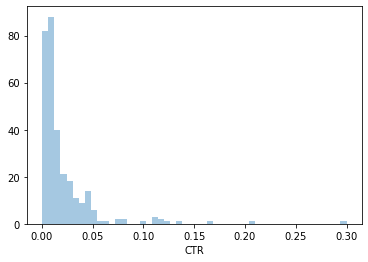

In [19]:
#Визуализируем данные по ctr

sns.distplot(df_events.CTR, kde = False)

#Видим ассиметричное распределение, оценка по среднему значению будет нецелесообразно. 

In [20]:
#Заполняем пустые значения,и находим объявления в которых не было просмотров, но были клики 
#Видимо есть какой-то баг, т.к. невозможно кликнуть на объявления(click), не посмотрев его(view)

df_events.fillna(0).query("view == 0")


event,ad_id,click,view,CTR
50,25665,14.0,0.0,0.0
77,30381,77.0,0.0,0.0
150,41424,2.0,0.0,0.0
161,42241,126.0,0.0,0.0
213,45866,21.0,0.0,0.0
219,46363,7.0,0.0,0.0
224,46544,14.0,0.0,0.0
294,113348,16.0,0.0,0.0
331,120444,9.0,0.0,0.0


In [21]:
#Создаем отдельную серию со списком id, где была обнаружена аномалия

ad_id_bags = df_events.fillna(0).query("view == 0").ad_id
ad_id_bags

50      25665
77      30381
150     41424
161     42241
213     45866
219     46363
224     46544
294    113348
331    120444
Name: ad_id, dtype: int64

In [22]:
#Из исходных данных отбираем только те, где были анамолии и считаем количество таких ad_id в зависимости от платформы

df[df.ad_id.isin(ad_id_bags)] \
    .groupby('platform',as_index=False)\
    .agg({'ad_id':'count'}) 

#Можно предположить, что на android баг встречается чаще, 

,platform,ad_id
0,android,141
1,ios,92
2,web,53


In [23]:
#Можно предположить, что на android баг встречается чаще
#Однако в целом событий на android происходит больше

df.groupby('platform',as_index=False)\
    .agg({'ad_id':'count'})


,platform,ad_id
0,android,1588211
1,ios,953078
2,web,635425


In [24]:
#А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

df_2019_04_04 = df.query("date == '2019-04-04'") \
                .groupby(['ad_id','event'],as_index=False) \
                .agg({'time':'count'}) \
                .pivot(index='ad_id',columns = 'event', values = 'time').reset_index() \
                .fillna(0)
df_2019_04_04

event,ad_id,click,view
0,9071,3.0,352.0
1,9776,37.0,1115.0
2,10601,3.0,848.0
3,11887,151.0,8720.0
4,12137,1.0,170.0
...,...,...,...
145,120790,0.0,19.0
146,121779,68.0,1116.0
147,121790,7.0,701.0
148,121941,0.0,95.0


In [25]:
df_2019_04_04['CTR'] = df_2019_04_04.click / df_2019_04_04.view

df_2019_04_04[df_2019_04_04.view > 0].CTR.quantile(q = 0.95)


0.06624288425047421

In [30]:
#Подсчитываем общую сумму выручку для тех, объявлений, которые приносят деньги 

#Это click за CPC
cost_click_cpc = df[(df.event == 'click') &(df.ad_cost_type == 'CPC')].ad_cost.sum()
cost_click_cpc


84810.0

In [32]:
#И view за CPM(в рассчете на тысячу показов)

cost_view_CPM = df[(df.event == 'view') & (df.ad_cost_type == 'CPM')].ad_cost.sum() / 1000
cost_view_CPM

497090.6778000003

In [34]:
total_cost = cost_click_cpc + cost_view_CPM
total_cost

581900.6778000003

In [40]:
#Посчитаем для каждого объявления timestamp для события
#И отберем те объявления, в которых событие клика было раньше, чем события просмотра 

df.groupby(['ad_id','event'],as_index=False) \
    .agg({'time':'min'}) \
    .pivot(index='ad_id',columns = 'event', values = 'time').reset_index() \
    .query('click < view')

#Обнаружен баг 

event,ad_id,click,view
27,16548,1.554336e+09,1.554336e+09
81,30939,1.554165e+09,1.554173e+09
138,40464,1.554164e+09,1.554164e+09
158,42007,1.554423e+09,1.554423e+09
185,44543,1.554336e+09,1.554337e+09
201,45436,1.554336e+09,1.554336e+09
324,119450,1.554336e+09,1.554336e+09
